# 0 Import


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2 train데이터 읽어오기


In [3]:
file_path = r"C:\Users\mungm\Documents\ai_engineer\docker_dev\data\mission15_train.csv"

df = pd.read_csv(file_path)

In [6]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,6,73,No,7,2,58.0
1,1,89,Yes,7,2,64.0
2,3,97,Yes,8,0,75.0
3,8,70,No,5,5,59.0
4,7,94,Yes,7,4,86.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     7000 non-null   int64  
 1   Previous Scores                   7000 non-null   int64  
 2   Extracurricular Activities        7000 non-null   object 
 3   Sleep Hours                       7000 non-null   int64  
 4   Sample Question Papers Practiced  7000 non-null   int64  
 5   Performance Index                 7000 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 328.2+ KB


In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,4.950000,69.429714,6.530571,4.607429,55.095143
std,2.590621,17.289197,1.696144,2.863550,19.151574
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

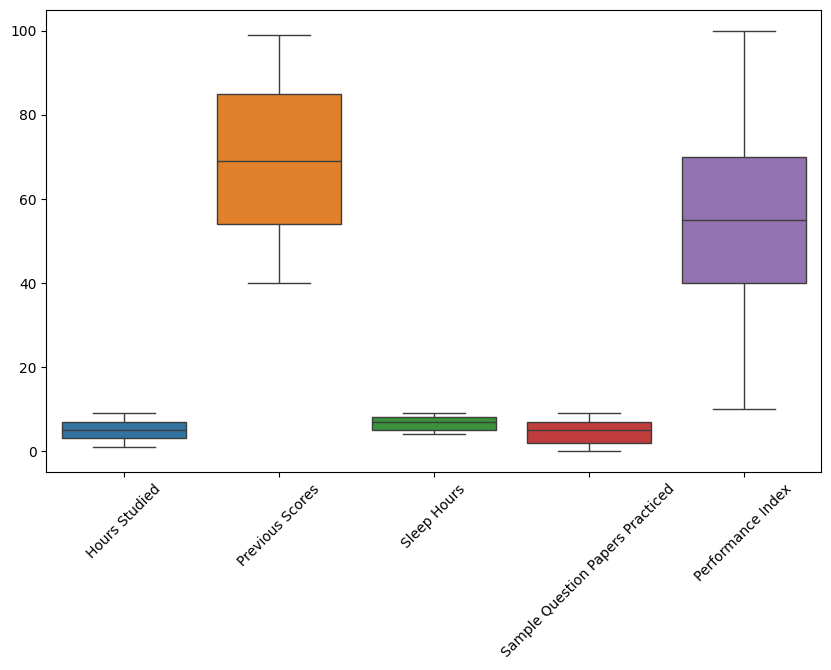

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [5]:
num_cols = df.select_dtypes(include="number").columns

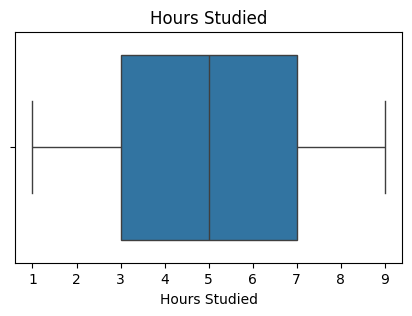

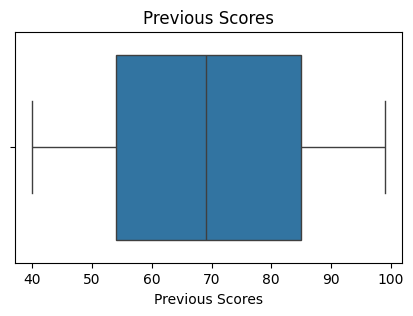

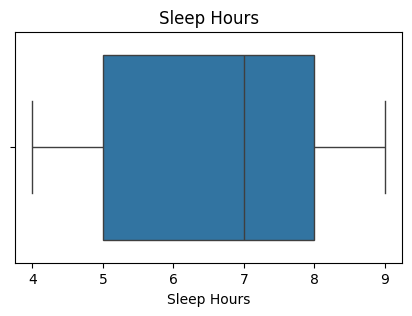

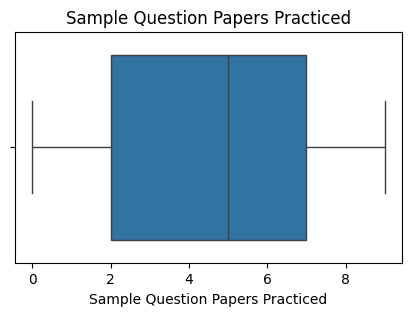

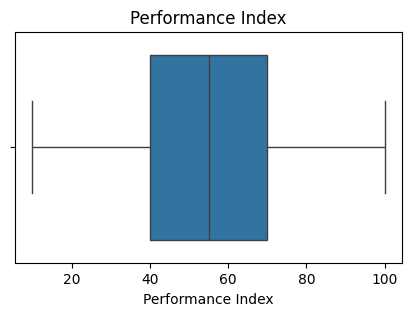

In [ ]:
for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

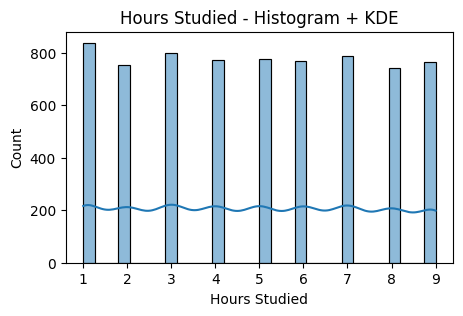

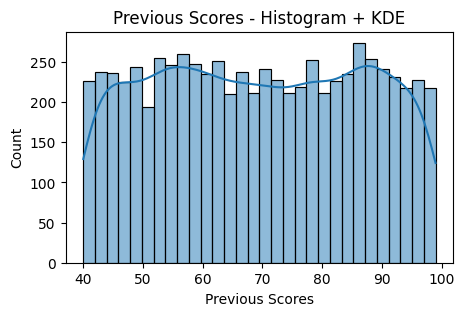

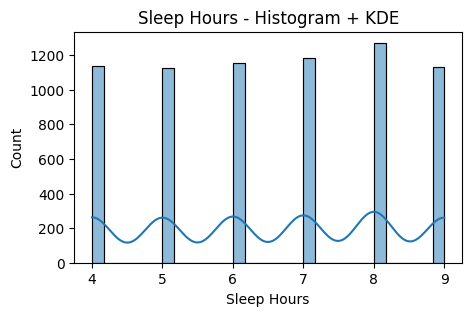

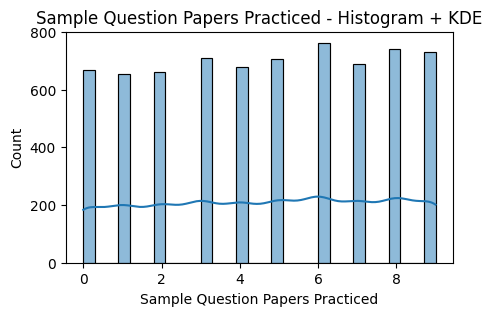

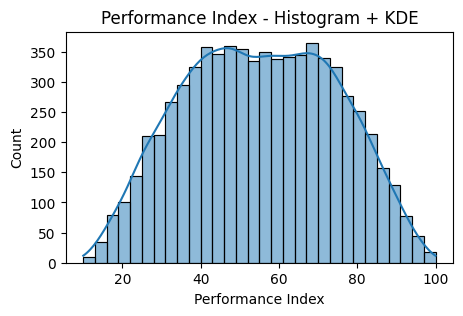

In [26]:
for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} - Histogram + KDE")
    plt.show()

In [6]:
outlier_summary = []

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    outlier_summary.append(
        {
            "column": col,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "lower_bound": lower,
            "upper_bound": upper,
            "outlier_count": outlier_count,
        }
    )

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,column,Q1,Q3,IQR,lower_bound,upper_bound,outlier_count
0,Hours Studied,3.0,7.0,4.0,-3.0,13.0,0
1,Previous Scores,54.0,85.0,31.0,7.5,131.5,0
2,Sleep Hours,5.0,8.0,3.0,0.5,12.5,0
3,Sample Question Papers Practiced,2.0,7.0,5.0,-5.5,14.5,0
4,Performance Index,40.0,70.0,30.0,-5.0,115.0,0


In [7]:
# @title 전처리: Yes / No → 수치형 변환 (필수)
df["extra_yn"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})

In [8]:
# @title 핵심 파생 지표 (추천 ⭐)
# ① 학습 효율 지수
# 공부 시간 대비 성적

df["study_efficiency"] = df["Previous Scores"] / df["Hours Studied"]

# 값 ↑ : 짧은 시간에 성과 좋음
# 값 ↓ : 학습 방법 개선 필요

In [9]:
# ② 실전 대비 학습 비율 ⭐
# 공부 중 문제풀이 비중

df["practice_ratio"] = df["Sample Question Papers Practiced"] / df["Hours Studied"]

# 시험형 평가 예측에 매우 중요

In [10]:
# ③ 수면 대비 학습 부담 지수
# 과부하 탐지용

df["study_sleep_ratio"] = df["Hours Studied"] / df["Sleep Hours"]

# 너무 크면 번아웃 가능성

In [11]:
# ④ 컨디션 보정 학습 지수
# 수면을 고려한 실질 학습량

df["conditioned_study"] = df["Sleep Hours"] * np.log1p(df["Hours Studied"])

In [12]:
# ⑤ 비교과 보정 학습 집중도 ⭐
# 비교과 활동을 고려한 순수 집중도

df["focus_index"] = df["Hours Studied"] / (df["extra_yn"] + 1)

# 비교과 활동 있는 경우 집중도 감소 반영

In [13]:
# ⑥ 학습 성장 잠재력
# 현재 노력 대비 기존 성적

df["growth_potential"] = df["Hours Studied"] / df["Previous Scores"]

# 기존 성적 낮고 학습량 많으면 ↑

In [14]:
# ⑦ 성과 대비 노력 지수
# 노력 대비 결과 효율

df["effort_result_ratio"] = df["Previous Scores"] / (
    df["Hours Studied"] + df["Sample Question Papers Practiced"]
)

In [15]:
# ⑧ 학습 몰입 종합 점수 ⭐⭐
df["learning_engagement"] = (
    df["Hours Studied"] + df["Sample Question Papers Practiced"] - df["extra_yn"] * 0.5
)

In [16]:
# ⑨ 학습 균형 점수
# 공부·수면·비교과 균형

df["balance_score"] = (df["Sleep Hours"] / (df["Hours Studied"] + 1)) * (
    1 + df["extra_yn"]
)

In [17]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,extra_yn,study_efficiency,practice_ratio,study_sleep_ratio,conditioned_study,focus_index,growth_potential,effort_result_ratio,learning_engagement,balance_score
0,6,73,No,7,2,58.0,0,12.166667,0.333333,0.857143,13.621371,6.0,0.082192,9.125000,8.0,1.000000
1,1,89,Yes,7,2,64.0,1,89.000000,2.000000,0.142857,4.852030,0.5,0.011236,29.666667,2.5,7.000000
2,3,97,Yes,8,0,75.0,1,32.333333,0.000000,0.375000,11.090355,1.5,0.030928,32.333333,2.5,4.000000
3,8,70,No,5,5,59.0,0,8.750000,0.625000,1.600000,10.986123,8.0,0.114286,5.384615,13.0,0.555556
4,7,94,Yes,7,4,86.0,1,13.428571,0.571429,1.000000,14.556091,3.5,0.074468,8.545455,10.5,1.750000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     7000 non-null   int64  
 1   Previous Scores                   7000 non-null   int64  
 2   Extracurricular Activities        7000 non-null   object 
 3   Sleep Hours                       7000 non-null   int64  
 4   Sample Question Papers Practiced  7000 non-null   int64  
 5   Performance Index                 7000 non-null   float64
 6   extra_yn                          7000 non-null   int64  
 7   study_efficiency                  7000 non-null   float64
 8   practice_ratio                    7000 non-null   float64
 9   study_sleep_ratio                 7000 non-null   float64
 10  conditioned_study                 7000 non-null   float64
 11  focus_index                       7000 non-null   float64
 12  growth

In [20]:
selected_columns = [
    "Hours Studied",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "extra_yn",
    "study_efficiency",
    "practice_ratio",
    "conditioned_study",
    "focus_index",
    "learning_engagement",
    "balance_score",
    "Performance Index"   # target → 반드시 마지막
]

df_selected = df[selected_columns]

df_selected.to_csv(
    r"C:\Users\mungm\Documents\ai_engineer\docker_dev\data\mission15_train_add.csv",
    index=False
)

print("train_add.csv 저장 완료")


train_add.csv 저장 완료
